In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [45]:
path = "/content/drive/Shareddrives/CNN/"
tables = pd.read_csv(path+'csv_files/flipkart_processed.csv')
images = np.load(path+'load_image/new_X.npy')

In [46]:
tables['labels'] = tables['labels'].replace({'Home & Kitchen':'Kitchen & Dining'})
tables['labels'] = tables['labels'].replace({'Home Improvement':'Tools & Hardware'})
tables['labels'] = tables['labels'].replace({'Health & Personal Care Appliances':'Beauty and Personal Care'})
tables['labels'] = tables['labels'].replace({'Sunglasses':'Eyewear'})
tables['labels'] = tables['labels'].replace({'Computers':'3C'})
tables['labels'] = tables['labels'].replace({'Gaming':'3C'})
tables['labels'] = tables['labels'].replace({'Home Entertainment':'3C'})
tables['labels'] = tables['labels'].replace({'Furniture':'Home Furnishing'})

In [47]:
label_counts = pd.DataFrame(tables['labels'].value_counts())
label_rare = label_counts[label_counts['labels']<20].index
relabel_index = list(tables[tables['labels'].isin(label_rare)].index)

In [49]:
tables.iloc[relabel_index,16] = np.nan

In [62]:
label_counts = pd.DataFrame(tables['labels'].value_counts())

In [50]:
#tables.to_csv(path+'csv_files/flipkart_processed2.csv')

In [54]:
#pd.DataFrame(tables.labels.value_counts()).to_csv(path+'csv_files/labels_new.csv')

In [35]:
label_counts = pd.DataFrame(tables['labels'].value_counts())
label_rare = label_counts[label_counts['labels']<200]

[2020-12-30 08:29:35,176 INFO utils]: NumExpr defaulting to 2 threads.


In [ ]:
for i in tables[tables['labels'] == 'Eyewear'].index:
  plt.imshow(images[i])
  plt.show()

In [42]:
for i in tables[tables['labels'] == 'Computers'].index:
  plt.imshow(images[i])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
from bs4 import BeautifulSoup
import requests
import os

In [89]:
for i in range(label_rare.shape[0]):
  amount = 200-int(label_rare.iloc[i].values)+50
  input = label_rare.index[i]
  response = requests.get(f"https://unsplash.com/s/photos/"+input)
  soup = BeautifulSoup(response.text, "lxml")
  results = soup.find_all("img", {"class": "_2UpQX"}, limit=amount)
  image_links = [result.get("src") for result in results]
  for index, link in enumerate(image_links):
      os.chdir(path+'Extra Images')
      if not os.path.exists(input):
          os.mkdir(input)  # 建立資料夾
      img = requests.get(link) 
      with open(path+'Extra Images/'+input+'/'+str(index+1) + ".jpg", "wb") as file:  # 開啟資料夾及命名圖片檔
          file.write(img.content)  # 寫入圖片的二進位碼

In [ ]:
input = 'Home & Kitchen'
keyword = input+'+amazon'
response = requests.get(f'https://tw.images.search.yahoo.com/search/images;_ylt=AwrtFmQeOuxfXD0Amlht1gt.;_ylu=c2VjA3NlYXJjaARzbGsDYnV0dG9u;_ylc=X1MDMjExNDcwNTAwNQRfcgMyBGFjdG4DY2xrBGNzcmNwdmlkA25MellYekV3TGpMYVpLa1lYNTZ0QXdIY01UUXdMZ0FBQUFCSjBSd0oEZnIDeWZwLXNlYXJjaC1zYgRmcjIDc2EtZ3AEZ3ByaWQDWHdfVE5SS2NSYTJvM2VqWHZ2OW9wQQRuX3N1Z2cDMARvcmlnaW4DdHcuaW1hZ2VzLnNlYXJjaC55YWhvby5jb20EcG9zAzAEcHFzdHIDBHBxc3RybAMEcXN0cmwDMTYEcXVlcnkDY29va2luZyUyMGFtYXpvbgR0X3N0bXADMTYwOTMxNjkwNQ--?p=cooking+amazon&fr=yfp-search-sb&fr2=sb-top-tw.images.search&ei=UTF-8&n=60&x=wrt')
soup = BeautifulSoup(response.text, "html.parser")
results = soup.find_all("img")
image_links = [result.get("src") for result in results]
count=1
for index, link in enumerate(image_links):
    os.chdir(path+'Extra Images')
    if not os.path.exists(input):
        os.mkdir(input)  # 建立資料夾
    try:
      img = requests.get(link)
      with open(path+'Extra Images/'+input+'/'+str(count) + ".jpg", "wb") as file:  # 開啟資料夾及命名圖片檔
        file.write(img.content)  # 寫入圖片的二進位碼
      count += 1
    except:
      pass

In [77]:
#resize and store extra image into np
#extract np from each label
#undersample large
#append small
import random
all_labels = list(tables.labels.unique())
#performs undersampling and sort images
for i in all_labels:
  random.seed(12345)
  same_cate_ind = list(tables[tables['labels'] == i].index)
  if len(same_cate_ind) > 2000:
    undersamp_ind = random.sample(same_cate_ind,1500)
    new_sample = images[undersamp_ind]
    np.save(path+'Resampled Np/'+str(i)+'.npy',new_sample)
    print(i,new_sample.shape[0])
  else:
    new_sample = images[same_cate_ind]
    np.save(path+'Resampled Np/'+str(i)+'.npy',new_sample)
    print(i,new_sample.shape[0])

Clothing 1500
Home Furnishing 880
Footwear 1227
Pet Supplies 30
nan 0
Pens & Stationery 313
Sports & Fitness 166
Beauty and Personal Care 753
Bags, Wallets & Belts 265
Home Decor & Festive Needs 929
Automotive 1012
Tools & Hardware 472
Baby Care 451
Mobiles & Accessories 1099
Watches 204
Toys & School Supplies 330
Jewellery 1500
Eyewear 50
Kitchen & Dining 671
3C 632
Cameras & Accessories 82


In [96]:
def img_to_square(img, side_length=256):
    h, w, d = img.shape
    WHITE = [255,255,255]
    if h > w:
        new_h = side_length
        resized = cv2.resize(img,(int(w*new_h/h),new_h),interpolation=cv2.INTER_CUBIC)
        left_border = right_border = (new_h-int(w*new_h/h))//2
        if (new_h-int(w*new_h/h))%2 != 0:
            right_border += 1
        return cv2.copyMakeBorder(resized,0,0,left_border,right_border,cv2.BORDER_CONSTANT,value=WHITE)
    elif h < w:
        new_w = side_length
        resized = cv2.resize(img,(new_w,int(h*new_w/w)),interpolation=cv2.INTER_CUBIC)
        top_border = bottom_border = (new_w-int(h*new_w/w))//2
        if (new_w-int(h*new_w/w))%2 != 0:
            bottom_border += 1
        return cv2.copyMakeBorder(resized,top_border,bottom_border,0,0,cv2.BORDER_CONSTANT,value=WHITE)
    else:
        return cv2.resize(img,(side_length,side_length),interpolation=cv2.INTER_CUBIC)

In [119]:
aug_cate = ['Cameras & Accessories','Pet Supplies','Eyewear','Sports & Fitness']
Cameras_Accessories = []
Pet_Supplies = []
Eyewear = []
Sports_Fitness = []
for i in aug_cate:
  for j in range(70) :
      image = cv2.imread(path+'/Extra Images/'+i+'/'+str(j)+'.jpg')
      try:
        plt.imshow(image)
        plt.show()
        sized_image = img_to_square(image, side_length=256)
        if i == 'Cameras & Accessories':
          Cameras_Accessories.append(sized_image)
        elif i == 'Pet Supplies':
          Pet_Supplies.append(sized_image)
        elif i == 'Eyewear':
          Eyewear.append(sized_image)
        elif i == 'Sports & Fitness':
          Sports_Fitness.append(sized_image)
      except:
        pass

Output hidden; open in https://colab.research.google.com to view.

In [117]:
x= img_to_square(cv2.imread(path+'/Extra Images/Sports & Fitness/21.jpg'))

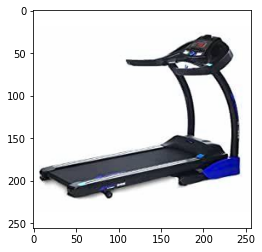

In [118]:
plt.imshow(x)

In [129]:
#augment the scraped images into original data
combi = [Cameras_Accessories,Pet_Supplies,Eyewear,Sports_Fitness]
for i,j in enumerate(aug_cate):
  original = np.load(path+'/Resampled Np/'+j+'.npy')
  print(j)
  print('original:',original.shape)
  augmented = np.append(original,np.array(combi[i]),axis=0)
  np.save(path+'/Resampled Np/'+j+'.npy',augmented)
  print('new:',augmented.shape)

Cameras & Accessories
original: (82, 256, 256, 3)
new: (136, 256, 256, 3)
Pet Supplies
original: (30, 256, 256, 3)
new: (84, 256, 256, 3)
Eyewear
original: (50, 256, 256, 3)
new: (107, 256, 256, 3)
Sports & Fitness
original: (166, 256, 256, 3)
new: (218, 256, 256, 3)


,labels
Clothing,5048
Jewellery,3531
Footwear,1227
Mobiles & Accessories,1099
Automotive,1012
Home Decor & Festive Needs,929
Home Furnishing,880
Beauty and Personal Care,753
Kitchen & Dining,671
3C,632
